In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Replace with the actual path to your file
file_path = '/content/drive/MyDrive/Deep_Dive_Project/uiuc-gpa.pk'

with open(file_path, 'rb') as f:
  df = pickle.load(f)

print(df.shape)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(58864, 508)


,Year,Number,Avg GPA,A+,A,A-,B+,B,B-,C+,...,"Primary Instructor_Wright, Margaret","Primary Instructor_Wu, Martin G","Primary Instructor_Yang, Xi","Primary Instructor_Yu, Albert","Primary Instructor_Zhang, Jianhua","Primary Instructor_Zhang, Li","Primary Instructor_Zhang, Zheng","Primary Instructor_Zhao, Kai","Primary Instructor_Zhao, Rui","Primary Instructor_Zilles, Craig"
0,2023,100,3.530909,0,11,5,1,4,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2023,100,3.797391,0,17,2,1,2,1,0,...,False,False,False,False,False,False,False,False,False,False
2,2023,100,3.476667,0,13,2,2,0,2,0,...,False,False,False,False,False,False,False,False,False,False
3,2023,200,3.606364,6,15,5,2,3,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2023,215,3.889091,16,12,2,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
5,2023,141,3.098889,0,5,4,6,5,2,0,...,False,False,False,False,False,False,False,False,False,False
6,2023,152,3.779427,55,115,0,4,9,0,0,...,False,False,False,False,False,False,False,False,False,False
7,2023,232,3.777778,3,13,5,5,1,0,0,...,False,False,False,False,False,False,False,False,False,False
8,2023,425,3.944167,0,22,0,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
9,2023,457,3.758182,1,14,4,0,2,0,0,...,False,False,False,False,False,False,False,False,False,False


#### Linear Regression

In [ ]:
class GPALinearRegression():
    def __init__(self):
        # Initialize the linear regression model
        self.model = LinearRegression()
        self.features = None  # To keep track of feature names after preprocessing

    def preprocess_data(self, df):
        """
        Preprocess the dataframe:
        - Handle categorical variables
        - Ensure all features are numerical
        - Split data into features (X) and target (y)
        """
        '''
        # Drop missing values
        df = df.dropna()
        # Convert Categorical Variables to Numerical
        df = df.drop(columns=['YearTerm', 'Course Title'])
        df = pd.get_dummies(df, columns=['Term', 'Subject', 'Sched Type'], drop_first=True)
        # Only encode the most frequent intructors
        top_instrs = df['Primary Instructor'].value_counts().nlargest(300).index
        df['Primary Instructor'] = df['Primary Instructor'].apply(lambda x: x if x in top_instrs else 'Other')
        df = pd.get_dummies(df, columns=['Primary Instructor'], drop_first=True)
        '''

        # remove Avg GPA as y
        X = df.drop(['Avg GPA','A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-','D+', 'D', 'D-', 'F', 'W',], axis=1)
        columns = X.columns
        X = X.to_numpy(np.float64)
        print(f"X shape {X.shape}")
        y = df['Avg GPA'].to_numpy(np.float64).reshape(-1, 1)
        print(f"X shape {y.shape}")

        self.features = X

        return X, y, columns

    def split_data(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
        print(f"X_train shape {X_train.shape}")
        print(f"y_train shape {y_train.shape}")
        print(f"X_test  shape {X_test.shape}")
        print(f"X_test  shape {y_test.shape}")
        return X_train, y_train, X_test, y_test

    def train(self, X, y):
        """
        Train the linear regression model.
        """
        self.model.fit(X, y)
        print("Model training completed.")

    def test(self, X, y):
        """
        Test the model and return performance metrics.
        """
        y_pred = self.model.predict(X)

        mse = mean_squared_error(y_pred, y_test)
        r2 = r2_score(y_test, y_pred)

        print(f"Mean Squared Error: {mse}")
        print(f"R-squared Score:    {r2}")

        return mse, r2

    def predict(self, X):
        """
        Make predictions with the trained model.
        """
        return self.model.predict(X)

    def get_coefficients(self):
        """
        Get the coefficients of the trained model.
        """
        print("Coef {self.model.coef_}")
        return self.model.coef_

In [ ]:
# Initialize the model
regressor = GPALinearRegression()

# Preprocess the data
X, y, columns = regressor.preprocess_data(df)

# Split data into training and testing sets
X_train, y_train, X_test, y_test = regressor.split_data(X, y)
X_train_df = pd.DataFrame(X_train, columns=columns)
y_train_df = pd.DataFrame(y_train)

# Train the model
regressor.train(X_train_df, y_train_df)

# Test the model
#mse, r2 = regressor.test(X_test, y_test)

X shape (58864, 493)
X shape (58864, 1)
X_train shape (47091, 493)
y_train shape (47091, 1)
X_test  shape (11773, 493)
X_test  shape (11773, 1)
Model training completed.


In [ ]:
print(columns[:20])

Index(['Year', 'Number', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-',
       'D+', 'D', 'D-', 'F', 'W', 'Term_Spring', 'Term_Summer', 'Term_Winter',
       'Subject_ABE'],
      dtype='object')


In [ ]:
!pip install shap

In [ ]:
# compute the SHAP values for the linear model
import shap
X_test_df = pd.DataFrame(X_test, columns=columns)
X100 = shap.utils.sample(X_test_df, 100)

In [ ]:
explainer = shap.Explainer(regressor.predict, X100)
shap_values = explainer(X100)

PermutationExplainer explainer: 101it [00:25,  2.21it/s]


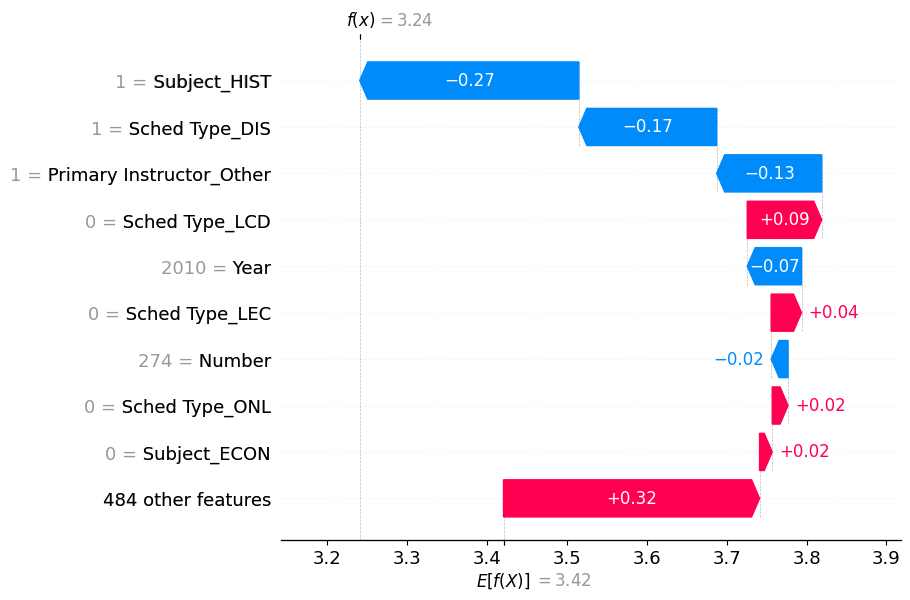

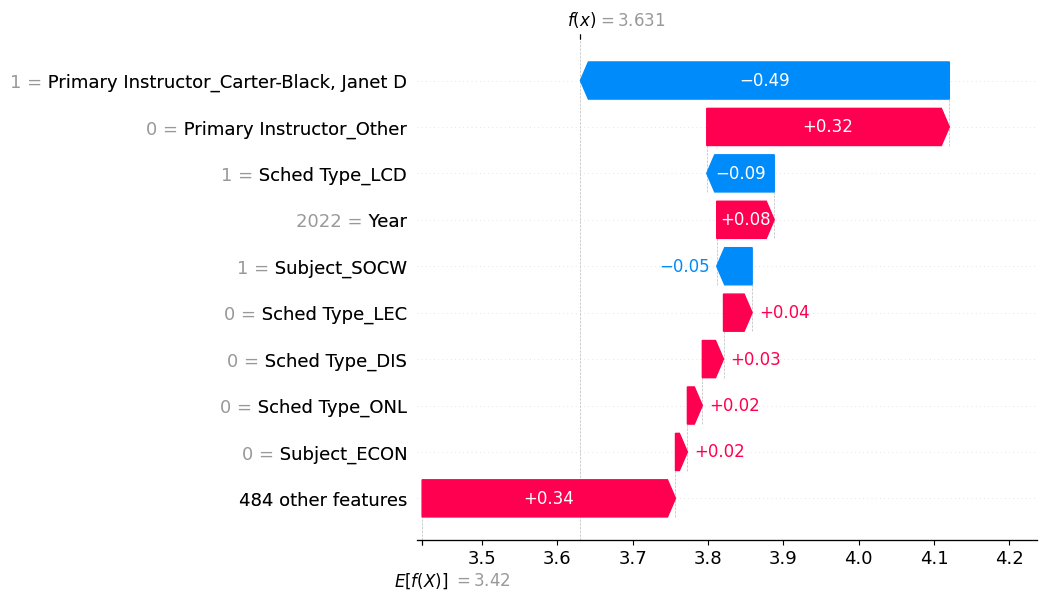

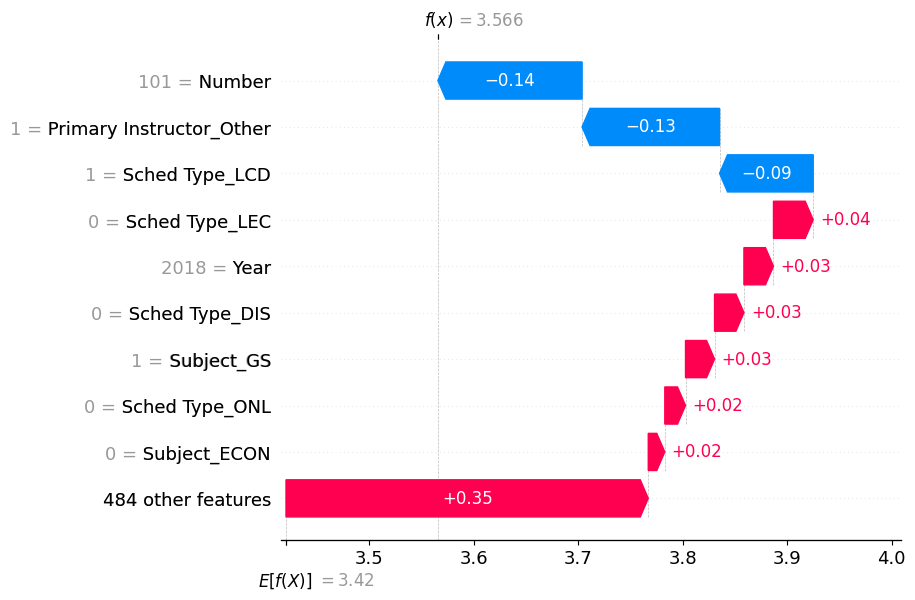

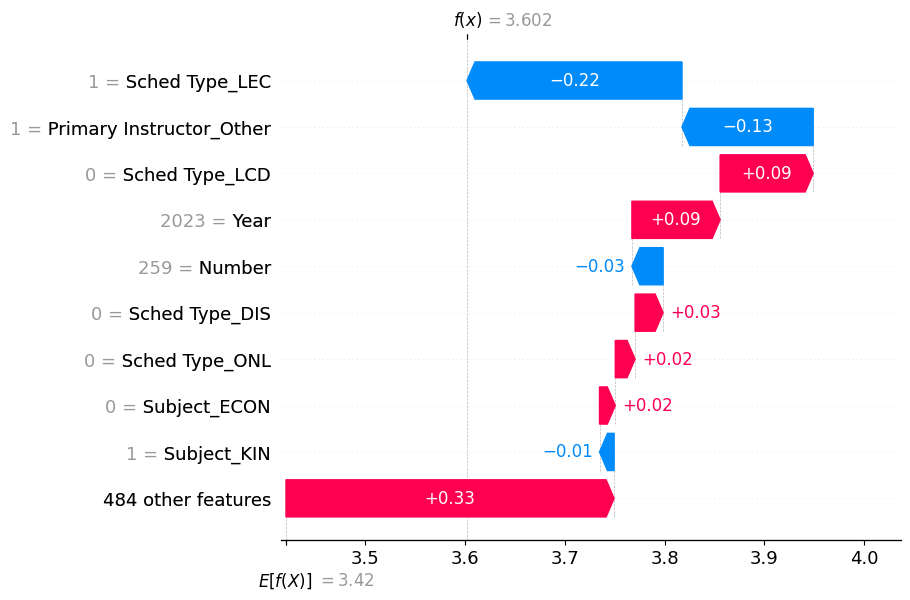

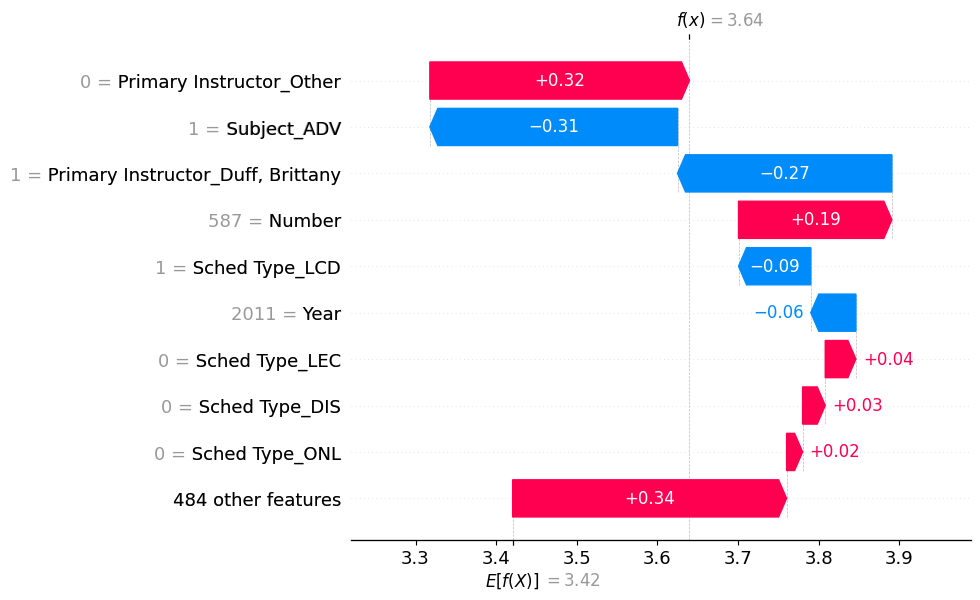

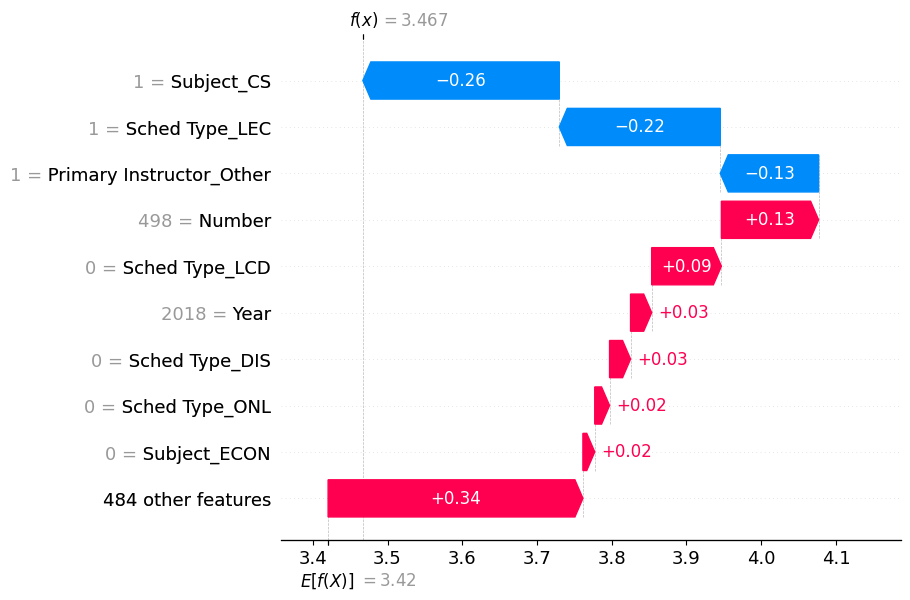

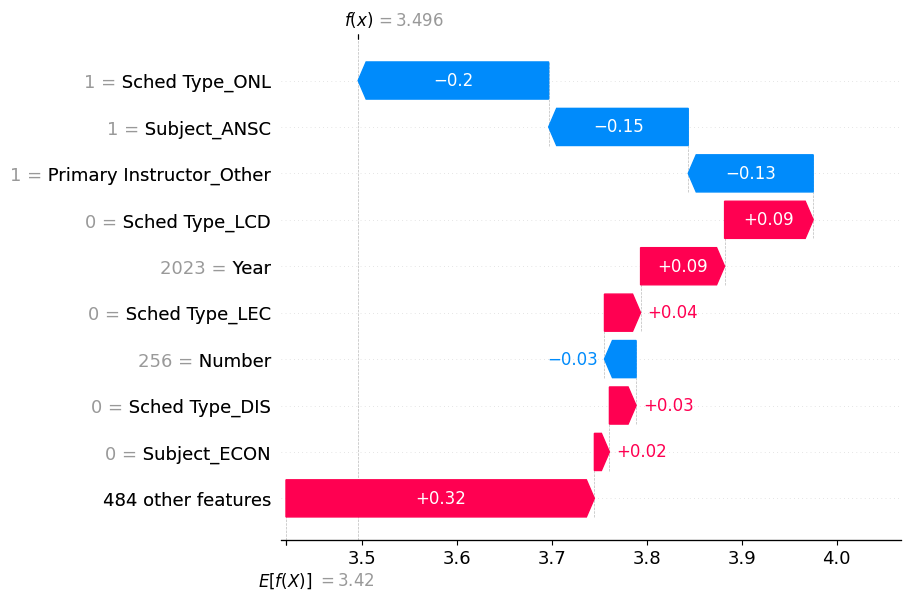

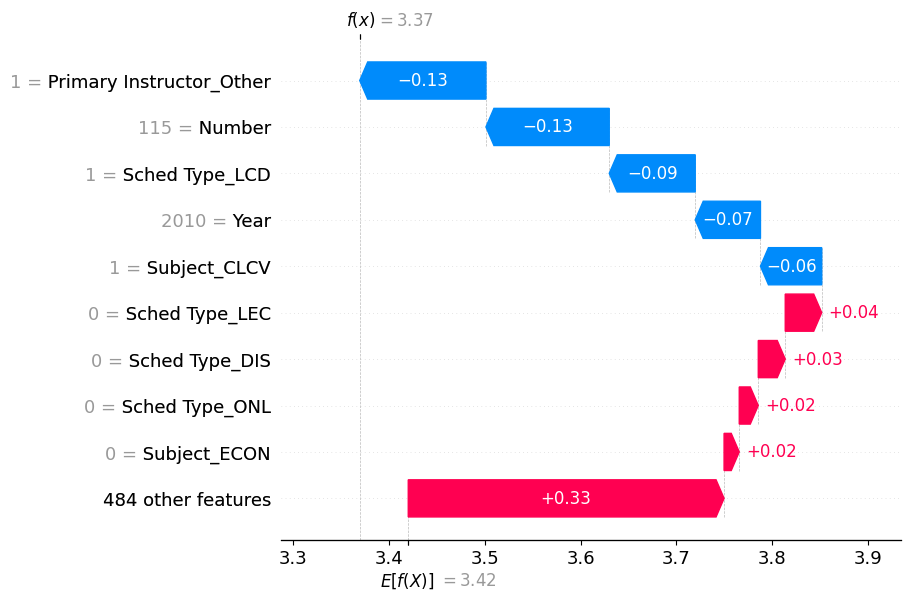

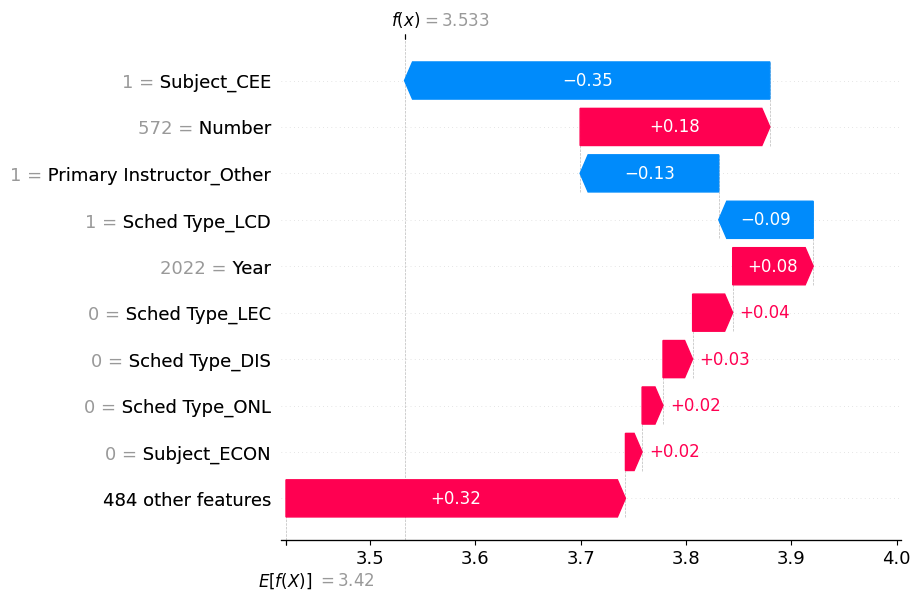

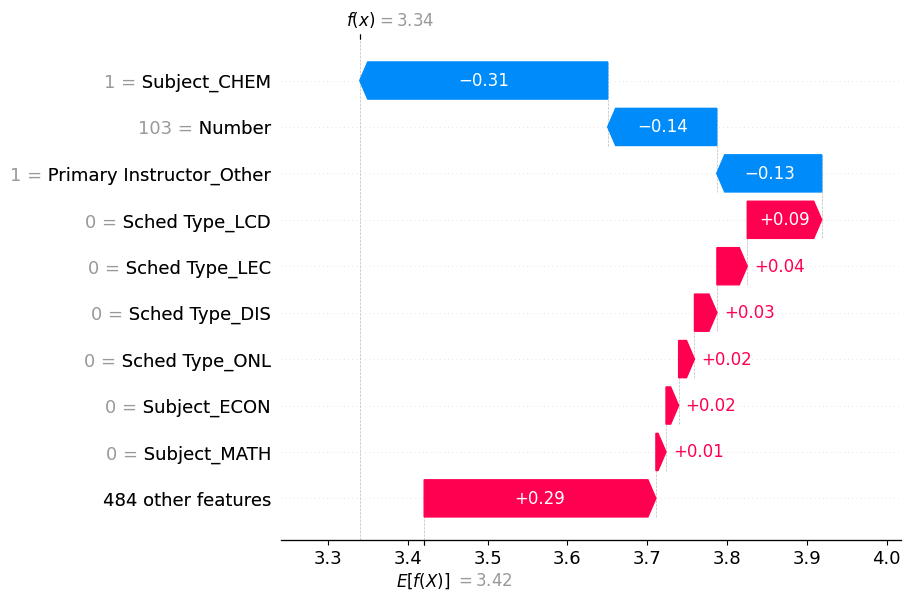

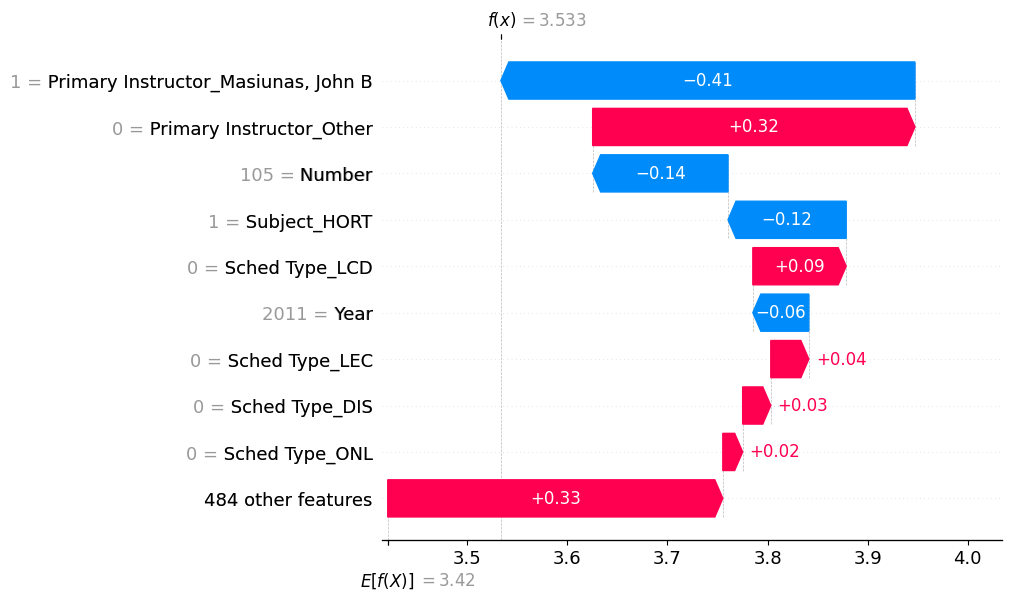

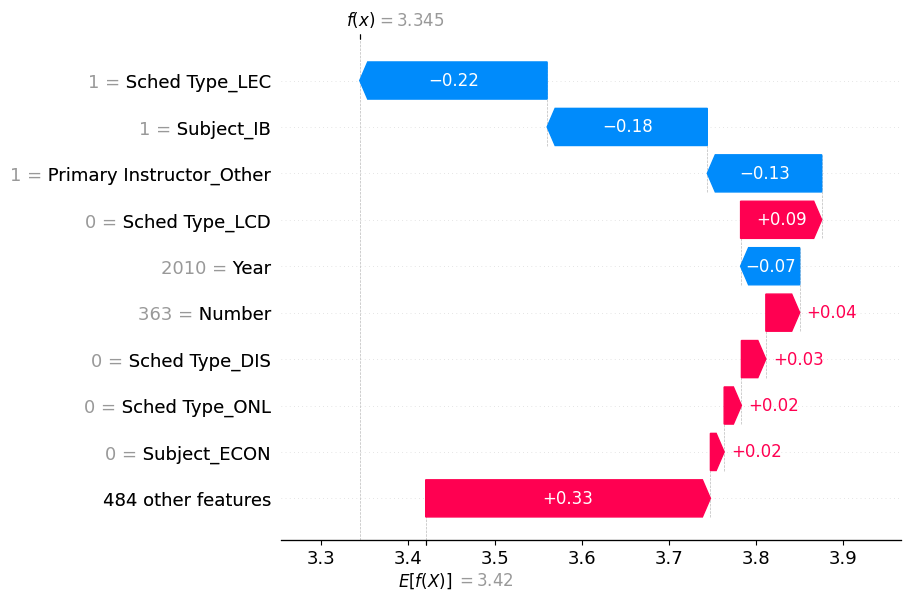

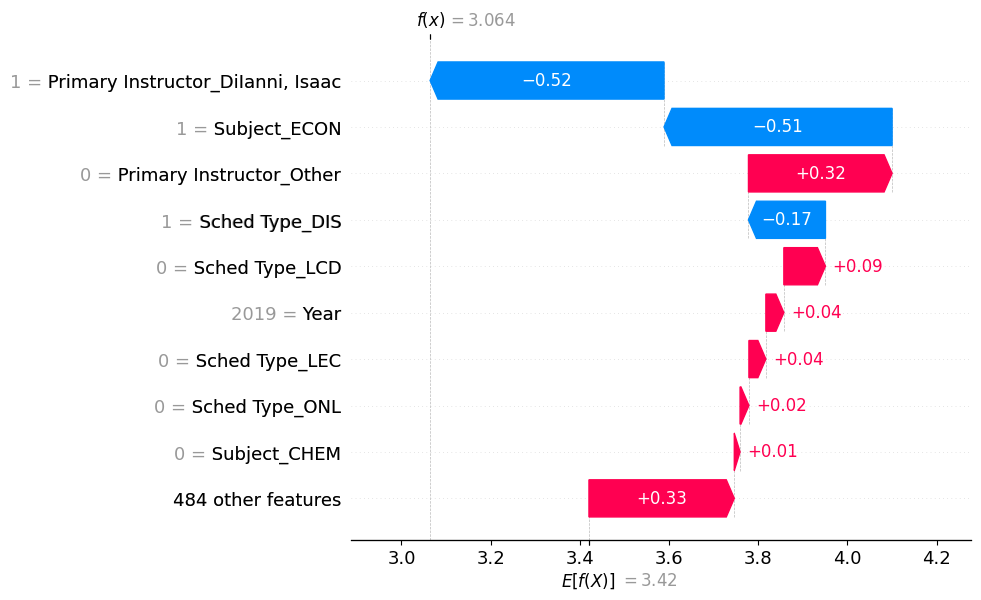

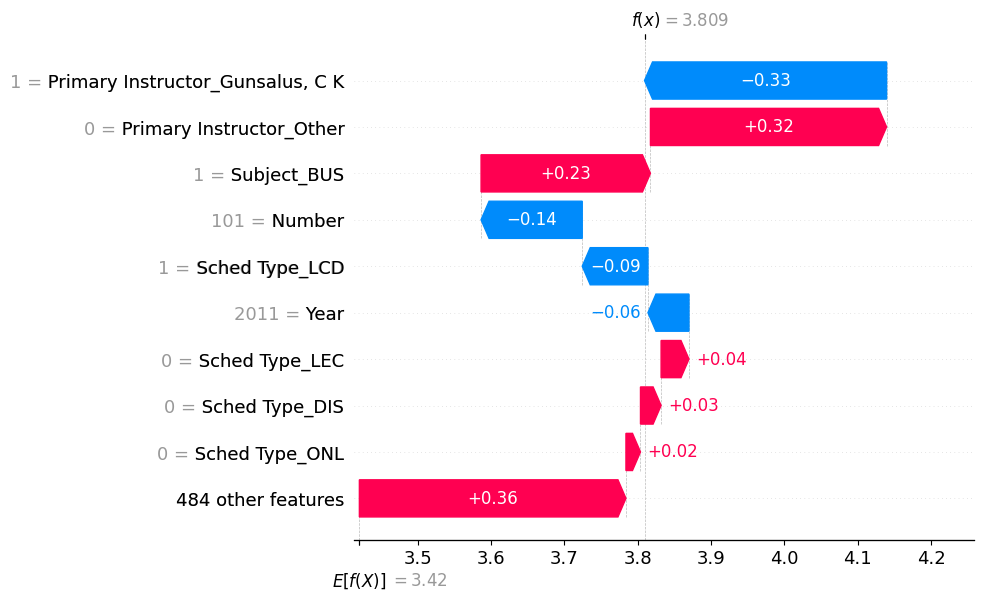

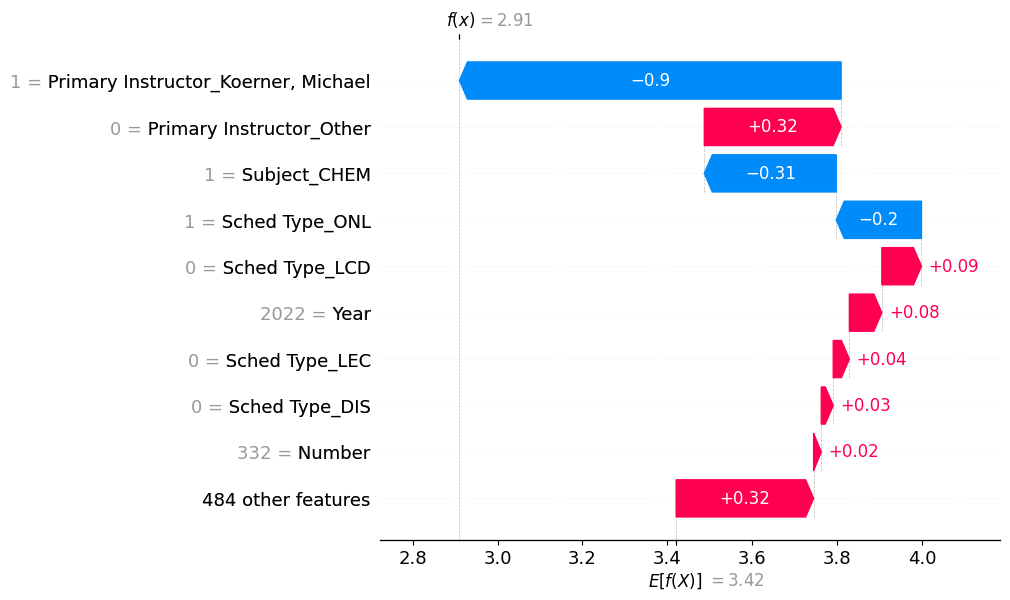

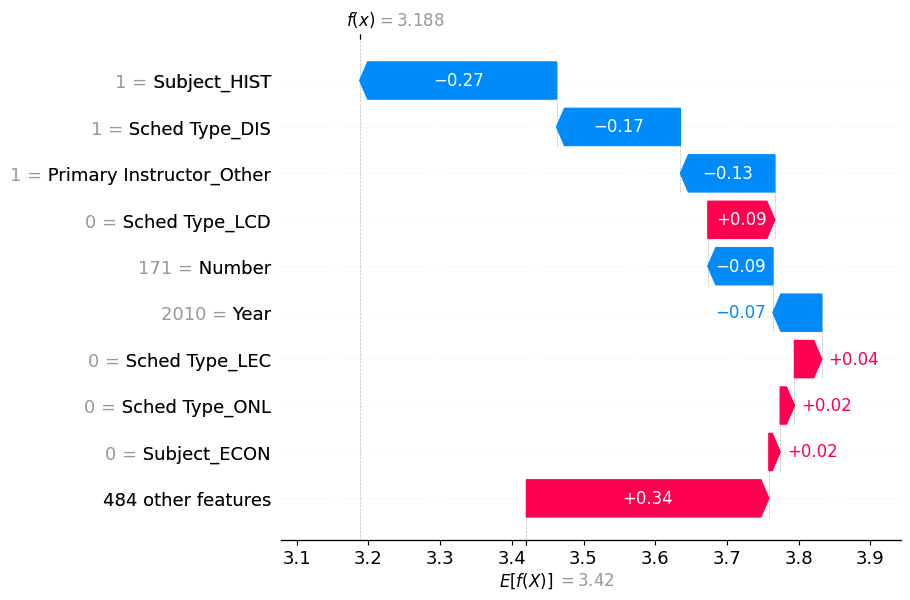

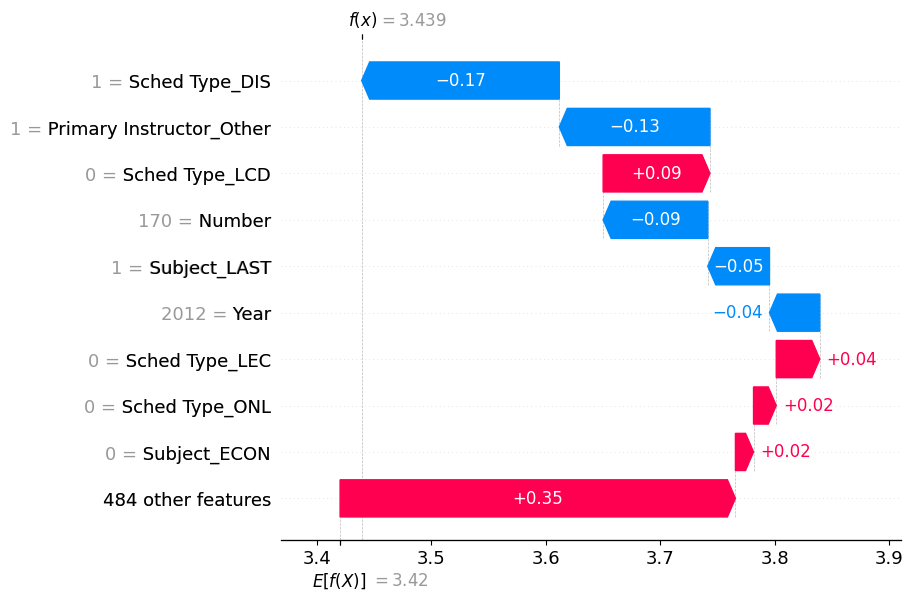

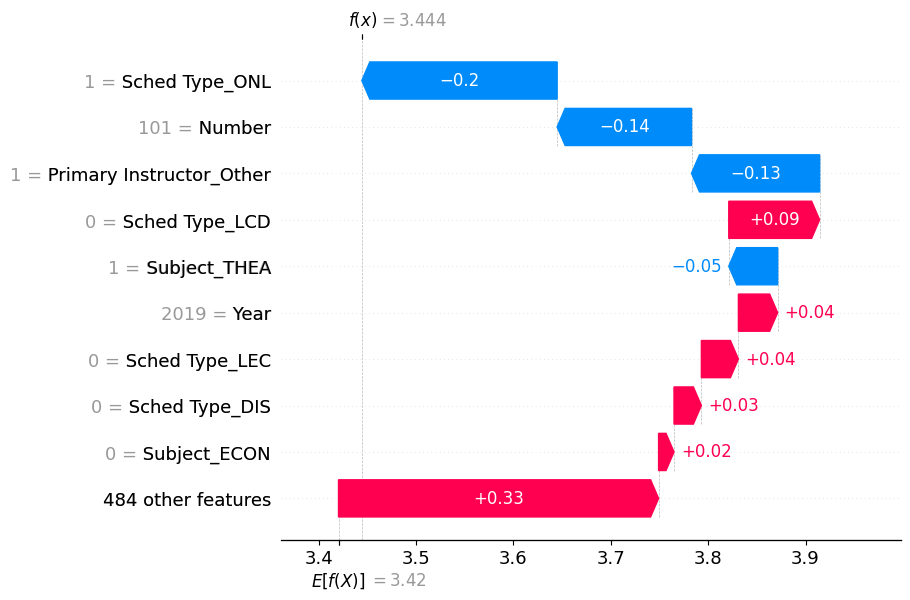

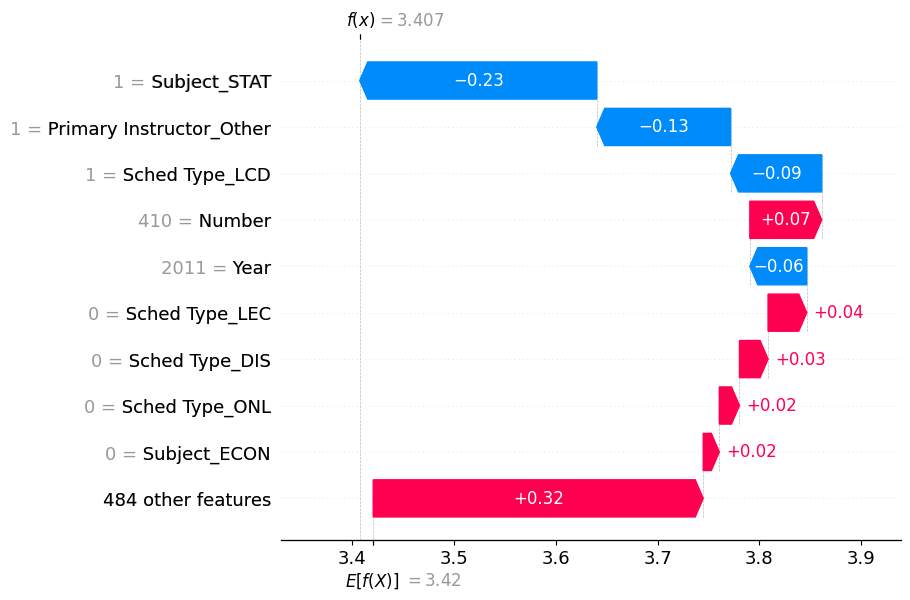

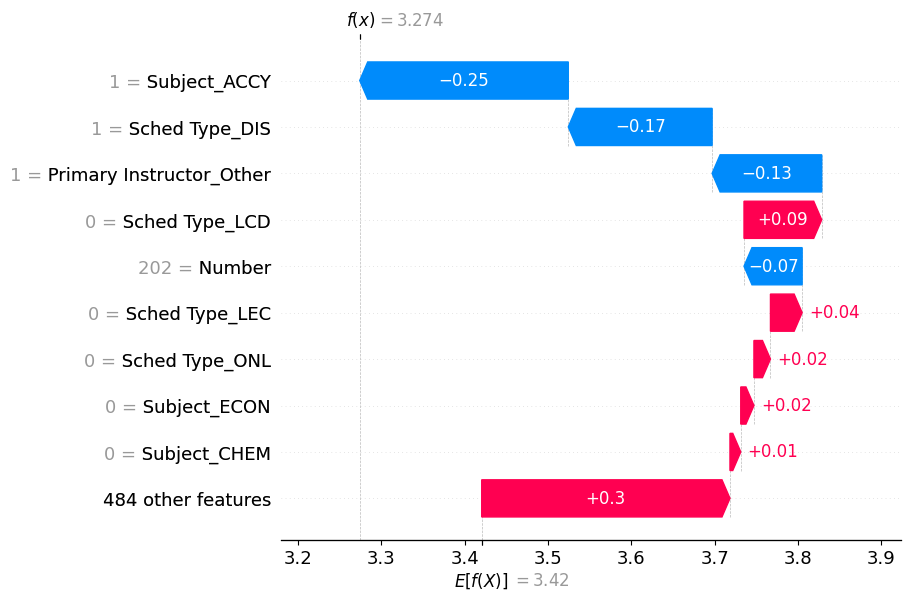

In [ ]:
## The Shap Values on single datapoint

for sample_ind in range(20):
  shap.plots.waterfall(shap_values[sample_ind], max_display=10)

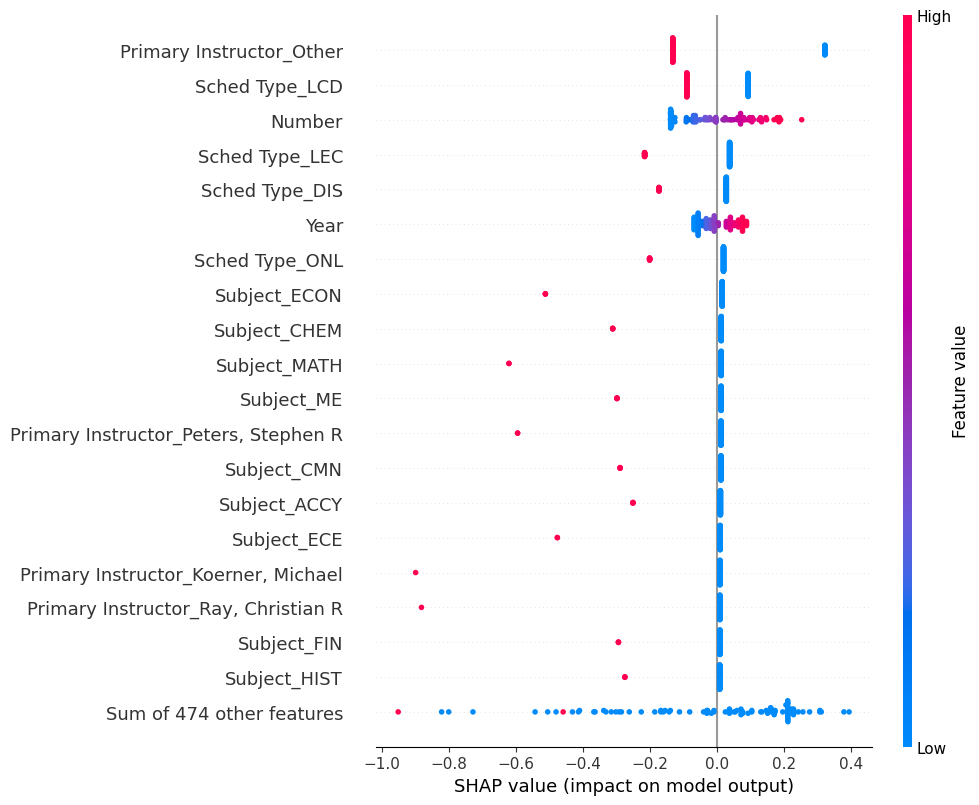

In [ ]:
# The average SHAP values on top-20 features
shap.plots.beeswarm(shap_values, max_display=20)

## Conclusion

Since we have numerous features in the dataset, the effect on each individual feature is quite diverse.

Overall, we find the features that have the most significant effects include:

1) Primary Instructor

2) Sched Type (LCD/LEC/DIS)

3) Number

4) Year

In [ ]:
# Get model coefficients
coeffs = regressor.get_coefficients()
print(coeffs.shape)
print(coeffs)

Coef {self.model.coef_}
(1, 510)
[[ 8.05526685e-03  3.64682439e-04  2.00975883e-03  3.23403737e-03
   2.25752453e-03  3.31274055e-04 -3.20919227e-03 -8.27006340e-03
   7.63476226e-04 -5.84504285e-03 -6.13949099e-03  6.68874408e-03
  -1.78999226e-02 -1.98501550e-02 -4.03186631e-02  6.19766500e-03
  -1.92813977e+08 -1.92813977e+08 -1.92813977e+08 -1.92813977e+08
   8.60413211e+07  8.60413210e+07  8.60413209e+07  8.60413208e+07
   8.60413212e+07  8.60413209e+07  8.60413208e+07  8.60413209e+07
   8.60413210e+07  8.60413211e+07  8.60413211e+07  8.60413213e+07
   8.60413210e+07  8.60413212e+07  8.60413210e+07  8.60413210e+07
   8.60413211e+07  8.60413208e+07  8.60413211e+07  8.60413209e+07
   8.60413211e+07  8.60413211e+07  8.60413208e+07  8.60413209e+07
   8.60413210e+07  8.60413209e+07  8.60413209e+07  8.60413209e+07
   8.60413208e+07  8.60413210e+07  8.60413209e+07  8.60413211e+07
   8.60413211e+07  8.60413209e+07  8.60413210e+07  8.60413211e+07
   8.60413211e+07  8.60413213e+07  8.604132

#### Linear Regression Feature Importance

['Year', 'Number', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W', 'Term_Fall', 'Term_Spring', 'Term_Summer', 'Term_Winter', 'Subject_AAS', 'Subject_ABE', 'Subject_ACCY', 'Subject_ACE', 'Subject_ACES', 'Subject_ADV', 'Subject_AE', 'Subject_AFRO', 'Subject_AFST', 'Subject_AGCM', 'Subject_AGED', 'Subject_AHS', 'Subject_AIS', 'Subject_ALEC', 'Subject_ANSC', 'Subject_ANTH', 'Subject_ARAB', 'Subject_ARCH', 'Subject_ART', 'Subject_ARTD', 'Subject_ARTE', 'Subject_ARTF', 'Subject_ARTH', 'Subject_ARTJ', 'Subject_ARTS', 'Subject_ASRM', 'Subject_ASTR', 'Subject_ATMS', 'Subject_AVI', 'Subject_BADM', 'Subject_BCOG', 'Subject_BCS', 'Subject_BDI', 'Subject_BIOC', 'Subject_BIOE', 'Subject_BIOP', 'Subject_BTW', 'Subject_BUS', 'Subject_CB', 'Subject_CEE', 'Subject_CHBE', 'Subject_CHEM', 'Subject_CHIN', 'Subject_CHLH', 'Subject_CHP', 'Subject_CI', 'Subject_CINE', 'Subject_CLCV', 'Subject_CMN', 'Subject_CPSC', 'Subject_CS', 'Subject_CW', 'Subject_CWL', 'Subject_DANC', 'Subjec

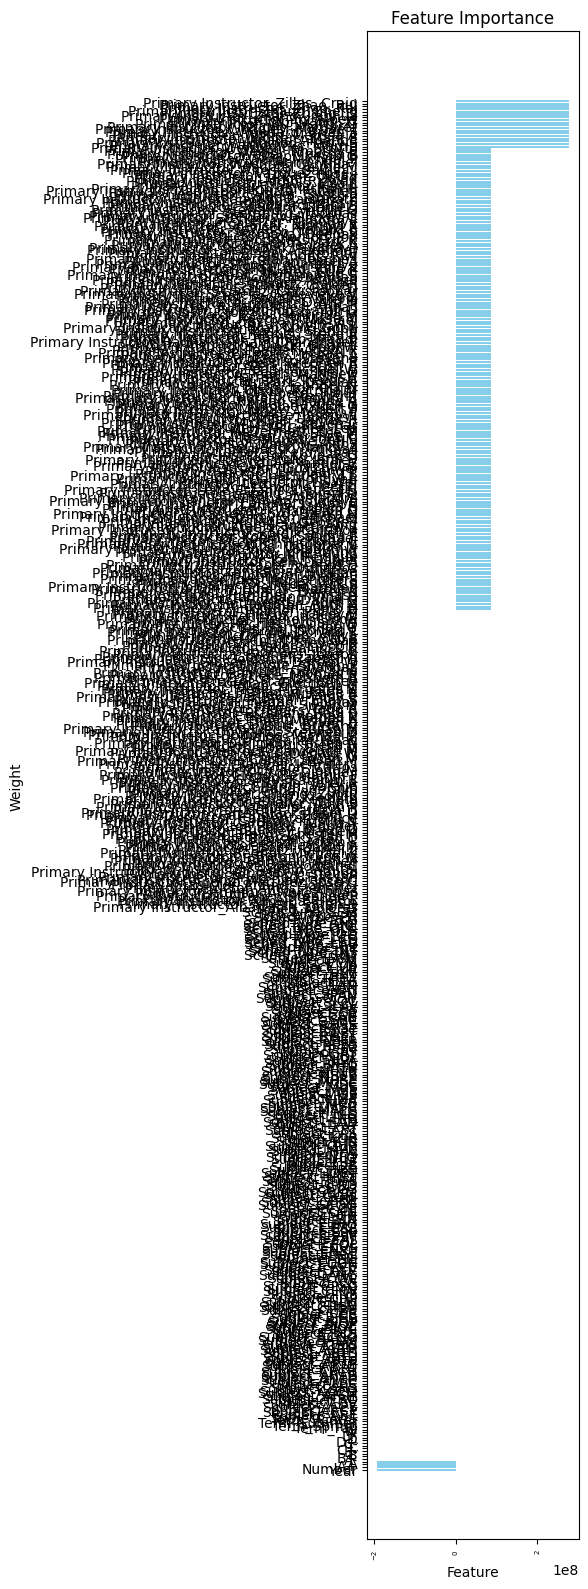

In [ ]:
cols = df.columns.tolist()
cols.remove("Avg GPA")
print(cols)

assert len(cols) == coeffs.flatten().shape[0]

coeffs = coeffs.flatten()
sorted_ids = np.argsort(coeffs)
cols = [cols[i] for i in sorted_ids]
coeffs = coeffs[sorted_ids]


plt.figure(figsize=(6, 16))
plt.barh(cols, coeffs.flatten(), color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Weight')
plt.xlabel('Feature')
plt.xticks(rotation=90, fontsize=5, ha='center')
plt.tight_layout()
plt.show()

# RNN

In [ ]:
from google.colab import drive
import pickle
drive.mount('/content/drive')
# Replace with the actual path to your file
file_path = '/content/drive/MyDrive/uiuc-gpa.pk'

with open(file_path, 'rb') as f:
  df = pickle.load(f)

print(df.shape)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(58864, 508)


,Year,Number,Avg GPA,A+,A,A-,B+,B,B-,C+,...,"Primary Instructor_Wright, Margaret","Primary Instructor_Wu, Martin G","Primary Instructor_Yang, Xi","Primary Instructor_Yu, Albert","Primary Instructor_Zhang, Jianhua","Primary Instructor_Zhang, Li","Primary Instructor_Zhang, Zheng","Primary Instructor_Zhao, Kai","Primary Instructor_Zhao, Rui","Primary Instructor_Zilles, Craig"
0,2023,100,3.530909,0,11,5,1,4,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2023,100,3.797391,0,17,2,1,2,1,0,...,False,False,False,False,False,False,False,False,False,False
2,2023,100,3.476667,0,13,2,2,0,2,0,...,False,False,False,False,False,False,False,False,False,False
3,2023,200,3.606364,6,15,5,2,3,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2023,215,3.889091,16,12,2,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
5,2023,141,3.098889,0,5,4,6,5,2,0,...,False,False,False,False,False,False,False,False,False,False
6,2023,152,3.779427,55,115,0,4,9,0,0,...,False,False,False,False,False,False,False,False,False,False
7,2023,232,3.777778,3,13,5,5,1,0,0,...,False,False,False,False,False,False,False,False,False,False
8,2023,425,3.944167,0,22,0,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
9,2023,457,3.758182,1,14,4,0,2,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

class GPARNN:
    def __init__(self):
        self.model = None
        self.features = None
        self.scaler_X = StandardScaler()
        self.scaler_y = StandardScaler()

    def preprocess_data(self, df):
        df = df.dropna()
        df = df.drop(columns=['YearTerm', 'Course Title'])
        df = pd.get_dummies(df, columns=['Term', 'Subject', 'Sched Type'], drop_first=True)

        top_instrs = df['Primary Instructor'].value_counts().nlargest(100).index
        df['Primary Instructor'] = df['Primary Instructor'].apply(lambda x: x if x in top_instrs else 'Other')
        df = pd.get_dummies(df, columns=['Primary Instructor'], drop_first=True)

        X = df.drop('Avg GPA', axis=1)
        y = df['Avg GPA'].values.reshape(-1, 1)

        self.features = X.columns

        X = self.scaler_X.fit_transform(X)
        y = self.scaler_y.fit_transform(y)

        return X, y

    def split_data(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
        X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

        return X_train, y_train, X_val, y_val, X_test, y_test

    def build_model(self, input_shape, optimizer='adam', learning_rate=0.001):
        model = Sequential([
            LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True),
            LSTM(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(1)
        ])

        if optimizer == 'adam':
            opt = Adam(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            opt = RMSprop(learning_rate=learning_rate)
        elif optimizer == 'sgd':
            opt = SGD(learning_rate=learning_rate)

        model.compile(optimizer=opt, loss='mse')
        return model

    def train(self, X_train, y_train, X_val, y_val, batch_size=32, epochs=100, optimizer='adam', learning_rate=0.001):
        self.model = self.build_model((X_train.shape[1], X_train.shape[2]), optimizer, learning_rate)
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

        history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[early_stopping],
            verbose=1
        )
        return history

    def test(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        y_pred = self.scaler_y.inverse_transform(y_pred)
        y_test = self.scaler_y.inverse_transform(y_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Mean Squared Error: {mse}")
        print(f"R-squared Score: {r2}")

        return mse, r2

#df = pd.read_csv('uiuc-gpa.csv')

# Initialize the model
final_model = GPARNN()

# Preprocess the data
X, y = final_model.preprocess_data(df)

# Split data into training, validation, and testing sets
X_train, y_train, X_val, y_val, X_test, y_test = final_model.split_data(X, y)

KeyError: "['YearTerm', 'Course Title'] not found in axis"

In [ ]:
# Train the final model with the best parameters
best_params={'batch_size': 32, 'learning_rate': 0.001, 'optimizer': 'rmsprop'}
final_model = GPARNN()
X, y = final_model.preprocess_data(df)
X_train, y_train, X_val, y_val, X_test, y_test = final_model.split_data(X, y)
history = final_model.train(X_train, y_train, X_val, y_val, **best_params)

# Test the final model
mse, r2 = final_model.test(X_test, y_test)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1178/1178 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3699 - val_loss: 0.0406
Epoch 2/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0267 - val_loss: 0.0219
Epoch 3/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0145 - val_loss: 0.0161
Epoch 4/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0112 - val_loss: 0.0131
Epoch 5/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0083 - val_loss: 0.0100
Epoch 6/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0073 - val_loss: 0.0142
Epoch 7/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0065 - val_loss: 0.0083
Epoch 8/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0057 - val_loss: 0.0078
Epoch 9/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0050 - val_loss: 0.0088
Epoch 10/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0047 - val_loss: 0.0072
Epoch 11/100
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0045 - val_loss: 0.0087
Epoch 12/100
1178/1178 ━━━━━━━

368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.0006292866354247397
R-squared Score: 0.9959908063201448
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.0006319674842566044
R-squared Score: 0.995973726595917
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.0006359532798079395
R-squared Score: 0.9959483330384599
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.02598410476992114
R-squared Score: 0.8344549164786438
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.060011397246227005
R-squared Score: 0.6176665751109468
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.00808926133093142
R-squared Score: 0.9484632064674675
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.004836344057705318
R-squared Score: 0.9691875864856563
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.012043072801347504
R-squared Score: 0.9232734200232793
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Er

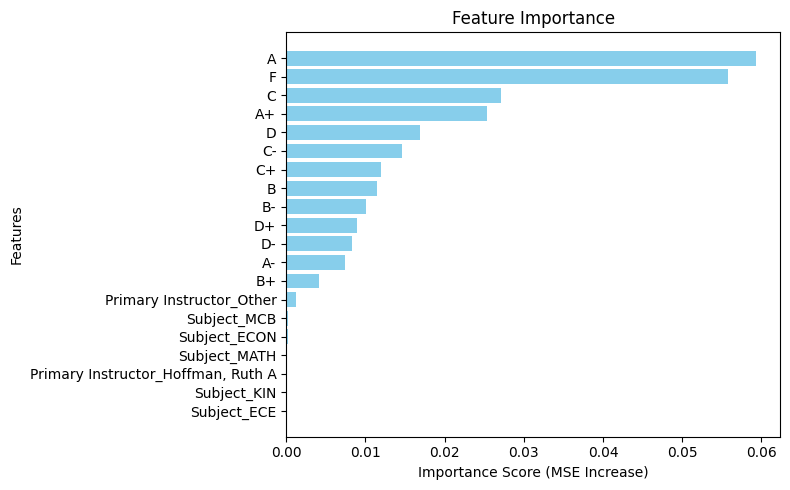

In [ ]:
import matplotlib.pyplot as plt

def compute_permutation_importance(model, X, y, metric='mse'):
    """
    Compute permutation importance for features.

    Args:
        model: Trained RNN model (GPARNN instance).
        X: Feature matrix (3D numpy array: samples, time_steps, features).
        y: Target vector (numpy array).
        metric: Performance metric ('mse' or 'r2').

    Returns:
        importance_scores: Dictionary of feature names and their importance scores.
    """
    # Ensure X is 3D
    assert len(X.shape) == 3, "Input X must be a 3D array (samples, time_steps, features)."

    # Flatten X temporarily to manipulate features
    X_flat = X.reshape(X.shape[0], X.shape[2])  # Convert to 2D: (samples, features)
    baseline_mse, _ = model.test(X, y)  # Baseline performance
    importance_scores = {}

    for i, feature in enumerate(model.features):
        # Shuffle one feature column
        X_shuffled = X_flat.copy()
        np.random.shuffle(X_shuffled[:, i])

        # Reshape back to 3D for model input
        X_shuffled_3d = X_shuffled.reshape(X.shape)

        # Reevaluate the model
        mse, _ = model.test(X_shuffled_3d, y)

        # Compute importance as performance drop
        importance_scores[feature] = mse - baseline_mse

    # Sort features by importance
    sorted_importance = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_importance)
def plot_feature_importance(importance_scores):
    """
    Visualize feature importance as a bar chart.

    Args:
        importance_scores: Dictionary of feature names and importance scores.
    """
    features, scores = zip(*importance_scores.items())
    plt.figure(figsize=(8, 5))
    plt.barh(features, scores, color='skyblue')
    plt.xlabel('Importance Score (MSE Increase)')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.tight_layout()
    plt.show()
def filter_importance_scores(importance_scores, threshold=0.01):
    """
    Filter features with importance scores below a given threshold.

    Args:
        importance_scores: Dictionary of feature names and their importance scores.
        threshold: Minimum importance score to retain a feature.

    Returns:
        filtered_scores: Dictionary of features meeting the threshold.
    """
    filtered_scores = {feature: score for feature, score in importance_scores.items() if abs(score) >= threshold}
    return filtered_scores
# Compute feature importance
importance_scores = compute_permutation_importance(final_model, X_test, y_test)
# Filter out features with small importance scores
threshold = 0.0001  # Adjust the threshold as needed
filtered_scores = filter_importance_scores(importance_scores, threshold)

# Visualize filtered feature importance
plot_feature_importance(filtered_scores)


# Result

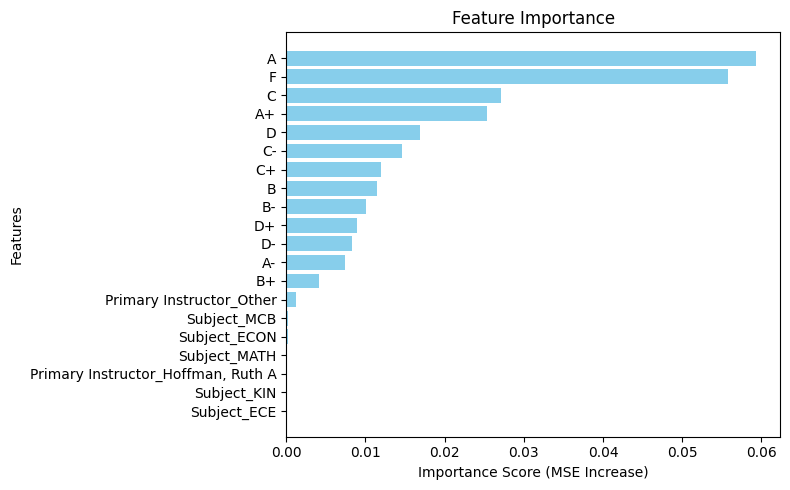

In [ ]:
threshold = 0.0001  # Adjust the threshold as needed
filtered_scores = filter_importance_scores(importance_scores, threshold)

# Visualize filtered feature importance
plot_feature_importance(filtered_scores)

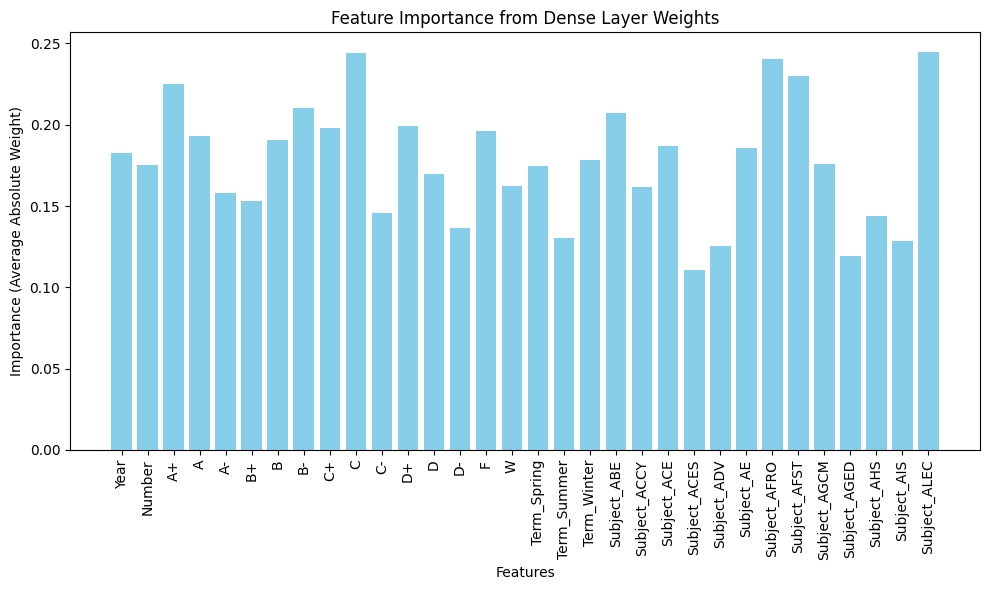

In [ ]:
lstm_layer = final_model.model.layers[0]  # Assuming this is an LSTM layer
weights = lstm_layer.get_weights()

kernel, recurrent_kernel, bias = weights
dense_layer = final_model.model.layers[-2]  # Access the second-to-last layer
dense_weights, dense_bias = dense_layer.get_weights()
import matplotlib.pyplot as plt
feature_importance = np.mean(np.abs(dense_weights), axis=1)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (Average Absolute Weight)')
plt.title('Feature Importance from Dense Layer Weights')
plt.xticks(range(32), final_model.features[:32], rotation=90)  # Display feature names on x-axis
plt.tight_layout()
plt.show()